# Creditcard Customer Prediction using Data Mining Algorithms

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BankChurners.csv")

In [3]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue


In [4]:
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df['Attrition_Flag']=le.fit_transform(df['Attrition_Flag'])
df['Gender']=le.fit_transform(df['Gender'])
df['Education_Level']=le.fit_transform(df['Education_Level'])
df['Marital_Status']=le.fit_transform(df['Marital_Status'])
df['Income_Category']=le.fit_transform(df['Income_Category'])
df['Card_Category']=le.fit_transform(df['Card_Category'])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category
0,1,45,1,3,3,1,2,0
1,1,49,0,5,2,2,4,0
2,1,51,1,3,2,1,3,0
3,1,40,0,4,3,3,4,0
4,1,40,1,3,5,1,2,0


#### Set the column Customer(Attrition_Flag) as a Prediction Value

In [5]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

## Spliting Data for Training and Testing

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=42)

# Logistic Regression

In [7]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver = 'liblinear')
model_lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [8]:
print("Coefficients of the Logistic Regression model")
coef = model_lr.coef_
intercept = model_lr.intercept_
print("Coef:", coef)
print("Intercept:", intercept)

Coefficients of the Logistic Regression model
Coef: [[-0.01339889  0.24720776 -0.00945949 -0.00032404  0.0005214  -0.01331096
   0.02632967]]
Intercept: [2.23267498]


In [9]:
predicted_classes_lr = model_lr.predict(X_test)

In [10]:
predicted_classes_lr_prob = model_lr.predict_proba(X_test)

Confusion matrix for LR model:
[[   0  661]
 [   0 3390]]


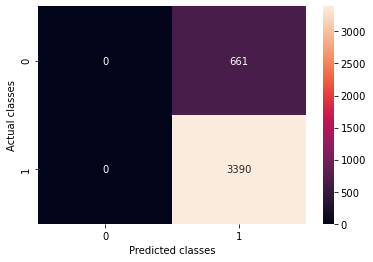

In [11]:
print("Confusion matrix for LR model:")
conf_mat_lr = confusion_matrix(y_test.tolist(), predicted_classes_lr)
print(conf_mat_lr)
sns.heatmap(conf_mat_lr, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [12]:
print(classification_report(y_test, predicted_classes_lr))

accuracy_lr = accuracy_score(y_test, predicted_classes_lr)
print("accuracy score for LR model::", accuracy_lr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       661
           1       0.84      1.00      0.91      3390

    accuracy                           0.84      4051
   macro avg       0.42      0.50      0.46      4051
weighted avg       0.70      0.84      0.76      4051

accuracy score for LR model:: 0.8368304122438904


# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

# before using decision tree classifier first predict that data set able to apply for traing
model_dt = DecisionTreeClassifier(criterion = 'entropy')
model_dt.fit(X_train,y_train)
predicted_classes_dt = model_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, predicted_classes_dt)
print("accuracy score  for DT model::", accuracy_dt)

accuracy score  for DT model:: 0.7097013083189336


#### accuracy score  for DT model > 0.5 
###### so this set able to apply for traing under Desition Tree Classifier

In [14]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
DecisionTreeClassifier()
predicted_classes_dt = model_dt.predict(X_test)

Confusion matrix for DT model:
[[ 121  540]
 [ 677 2713]]


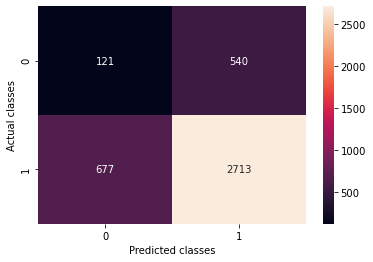

In [15]:
print("Confusion matrix for DT model:")
conf_mat_dt = confusion_matrix(y_test.tolist(), predicted_classes_dt)
print(conf_mat_dt)
sns.heatmap(conf_mat_dt, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [16]:
print(classification_report(y_test, predicted_classes_dt))

accuracy_dt = accuracy_score(y_test, predicted_classes_dt)
print("accuracy score  for DT model::", accuracy_dt)

              precision    recall  f1-score   support

           0       0.15      0.18      0.17       661
           1       0.83      0.80      0.82      3390

    accuracy                           0.70      4051
   macro avg       0.49      0.49      0.49      4051
weighted avg       0.72      0.70      0.71      4051

accuracy score  for DT model:: 0.6995803505307332


# Gaussian Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [18]:
predicted_classes_nb = model_nb.predict(X_test)

Confusion matrix for NB model:
[[   0  661]
 [   0 3390]]


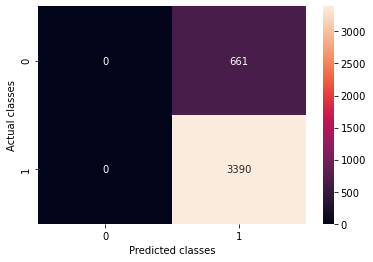

In [19]:
print("Confusion matrix for NB model:")
conf_mat_nb = confusion_matrix(y_test.tolist(), predicted_classes_nb)
print(conf_mat_nb)
sns.heatmap(conf_mat_nb, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [20]:
print(classification_report(y_test, predicted_classes_nb))

accuracy_nb = accuracy_score(y_test, predicted_classes_nb)
print("accuracy score for NB model::", accuracy_nb)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       661
           1       0.84      1.00      0.91      3390

    accuracy                           0.84      4051
   macro avg       0.42      0.50      0.46      4051
weighted avg       0.70      0.84      0.76      4051

accuracy score for NB model:: 0.8368304122438904


# Random Forest

Confusion matrix for RF model:
[[  35  626]
 [ 254 3136]]


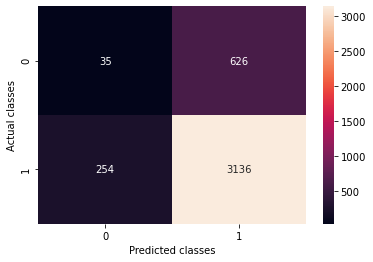

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

predicted_classes_rf = model_rf.predict(X_test)
print("Confusion matrix for RF model:")
conf_mat_rf = confusion_matrix(y_test.tolist(), predicted_classes_rf)
print(conf_mat_rf)
sns.heatmap(conf_mat_rf, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [22]:
print(classification_report(y_test, predicted_classes_rf))

accuracy_rf = accuracy_score(y_test, predicted_classes_rf)
print("accuracy score for RF model::", accuracy_rf)

              precision    recall  f1-score   support

           0       0.12      0.05      0.07       661
           1       0.83      0.93      0.88      3390

    accuracy                           0.78      4051
   macro avg       0.48      0.49      0.48      4051
weighted avg       0.72      0.78      0.75      4051

accuracy score for RF model:: 0.7827696864971612


# Support Vector Machine

Confusion matrix for SVM model:
[[   0  661]
 [   0 3390]]


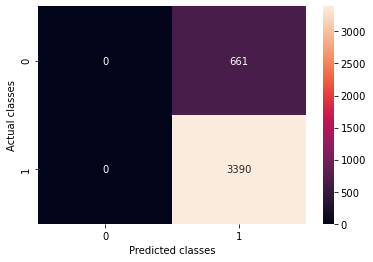

In [23]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train,y_train)

predicted_classes_svm = model_svm.predict(X_test)
print("Confusion matrix for SVM model:")
conf_mat_svm = confusion_matrix(y_test.tolist(), predicted_classes_svm)
print(conf_mat_svm)
sns.heatmap(conf_mat_svm, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [24]:
print(classification_report(y_test, predicted_classes_svm))

accuracy_svm = accuracy_score(y_test, predicted_classes_svm)
print("accuracy score for SVM model::", accuracy_svm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       661
           1       0.84      1.00      0.91      3390

    accuracy                           0.84      4051
   macro avg       0.42      0.50      0.46      4051
weighted avg       0.70      0.84      0.76      4051

accuracy score for SVM model:: 0.8368304122438904


In [25]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'Support Vector Machines'],
    'Score': [accuracy_lr, accuracy_dt, accuracy_nb, accuracy_rf, accuracy_svm]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.83683
2,Naive Bayes,0.83683
4,Support Vector Machines,0.83683
3,Random Forest,0.78277
1,Decision Tree,0.69958
